In [3]:
import pandas as pd
import numpy as np
import os
import glob

In [4]:
###files_join = os.path.join("/Users/noyannebioglu/Desktop/Data_Analysis/some_projects/UDEMY/RealWorldProjectSales/sales_data_to_analyze", "*.csv")

In [5]:
files_join = os.path.join("/Users/noyannebioglu/Desktop/DataAnalystProjects/sales_data_to_analyze", "*.csv")

In [6]:
list_files = glob.glob(files_join)
df = pd.concat(map(pd.read_csv, list_files), ignore_index=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745220 entries, 195356 to 1541458
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          745220 non-null  object 
 1   Product           745220 non-null  object 
 2   Quantity Ordered  745220 non-null  object 
 3   Price Each        745220 non-null  object 
 4   Order Date        745220 non-null  object 
 5   Purchase Address  745220 non-null  object 
 6   Unnamed: 0        745220 non-null  float64
 7   Unnamed: 0.1      745220 non-null  float64
 8   Unnamed: 0.1.1    745220 non-null  float64
 9   Unnamed: 0.1.1.1  745220 non-null  float64
dtypes: float64(4), object(6)
memory usage: 62.5+ MB


In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1
195356,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",146517.0,97678.0,48839.0,0.0
195357,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",146518.0,97679.0,48840.0,1.0
195358,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",146519.0,97680.0,48841.0,2.0
195359,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",146520.0,97681.0,48842.0,3.0
195360,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",146521.0,97682.0,48843.0,4.0


In [20]:
df.to_csv("12_months.csv", encoding="utf-8")

In [36]:
df.drop(["Unnamed: 0.1.1.1", "Unnamed: 0.1.1", "Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

### Checking for null values



In [37]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
months              0
dtype: int64

In [38]:
df.shape

(743800, 7)

### Dropping null values from DF

In [40]:
df.dropna(how="any", inplace=True,)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743800 entries, 195356 to 1541458
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          743800 non-null  object
 1   Product           743800 non-null  object
 2   Quantity Ordered  743800 non-null  object
 3   Price Each        743800 non-null  object
 4   Order Date        743800 non-null  object
 5   Purchase Address  743800 non-null  object
 6   months            743800 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 45.4+ MB


### Saving as a new CSV file, in case of any failure, we will have a new file in the path

In [44]:
df.to_csv("new_12_months.csv", encoding="utf-8")

### Creating a function to extract "months" from "order date" column

In [45]:
def month(x):
    return x.split('/')[0]

### Applying the function to the column

In [46]:
df["months"] = df["Order Date"].apply(month)

### Lets check the current status

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743800 entries, 195356 to 1541458
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          743800 non-null  object
 1   Product           743800 non-null  object
 2   Quantity Ordered  743800 non-null  object
 3   Price Each        743800 non-null  object
 4   Order Date        743800 non-null  object
 5   Purchase Address  743800 non-null  object
 6   months            743800 non-null  object
dtypes: object(7)
memory usage: 45.4+ MB


### Lets check the unique values in column.
#### Seems to be needed to filter "order date" values before converting the column into INTEGER

In [48]:
df['months'].value_counts()

12    99936
10    81128
04    73116
11    70292
05    66264
03    60612
07    57172
06    54216
02    47900
08    47844
09    46484
01    38836
Name: months, dtype: int64

### Filtering out the "order date" values

In [49]:
filter=df["months"]=="Order Date"
df=df[~filter]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
195356,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02
195357,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02
195358,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02
195359,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02
195360,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02


In [50]:
df["months"].value_counts()

12    99936
10    81128
04    73116
11    70292
05    66264
03    60612
07    57172
06    54216
02    47900
08    47844
09    46484
01    38836
Name: months, dtype: int64

### Casting as INTEGER, now we can make math calculations

In [51]:
df['months']=df['months'].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743800 entries, 195356 to 1541458
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          743800 non-null  object
 1   Product           743800 non-null  object
 2   Quantity Ordered  743800 non-null  object
 3   Price Each        743800 non-null  object
 4   Order Date        743800 non-null  object
 5   Purchase Address  743800 non-null  object
 6   months            743800 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 45.4+ MB


In [53]:
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Price Each']=df['Price Each'].astype(float)

### Lets crerate a column of sales which rerflects the sale amount by multiplying QO & PE

In [54]:
df["sales"] = df["Quantity Ordered"]*df["Price Each"]

### What is the best month of sales??
#### Seems to be the December is the winner, it is a holiday season!

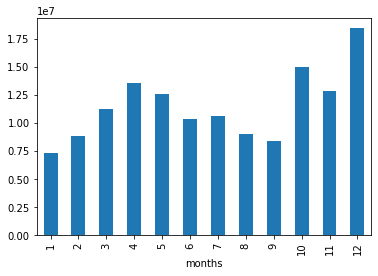

In [55]:
df.groupby("months")["sales"].sum().plot.bar()

Text(0, 0.5, 'Sales in US')

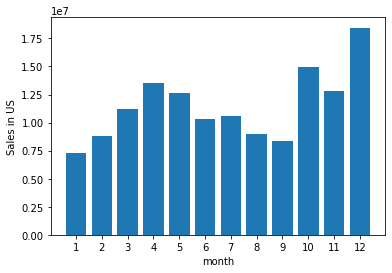

In [85]:
#to create a story out of it
import matplotlib.pyplot as plt
monthx=range(1,13)
plt.bar(monthx, df.groupby("months")["sales"].sum())
plt.xticks(monthx)
plt.xlabel("month")
plt.ylabel("Sales in US")

### First step to create a city column to split the city names and create series.

In [86]:
def city(x):
    x.split(",")[0]

In [87]:
#df["Purchase Address"].apply(city)

In [88]:
df["city"] = df["Purchase Address"].apply(city)

In [89]:
a = df["Purchase Address"].str.split(",")

### what time sales of product purchase hasthe maximum result?

In [90]:
def city(x):
    return x.split(",")[1] 

### Creating a column for cities, extracing values from "purchase address"

In [91]:
df["city"] = df["Purchase Address"].apply(city)

### Lets drop extra columns from our dataframe

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743800 entries, 195356 to 1541458
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          743800 non-null  object 
 1   Product           743800 non-null  object 
 2   Quantity Ordered  743800 non-null  int64  
 3   Price Each        743800 non-null  float64
 4   Order Date        743800 non-null  int64  
 5   Purchase Address  743800 non-null  object 
 6   months            743800 non-null  int64  
 7   sales             743800 non-null  float64
 8   city              743800 non-null  object 
 9   hour              743800 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 62.4+ MB


### Checking the unique ones for NAN or absurd values

In [93]:
df["city"].value_counts()

 San Francisco    178928
 Los Angeles      118420
 New York City     99504
 Boston            79736
 Atlanta           59524
 Dallas            59280
 Seattle           58928
 Portland          49860
 Austin            39620
Name: city, dtype: int64

### Which city has the placed the most order?

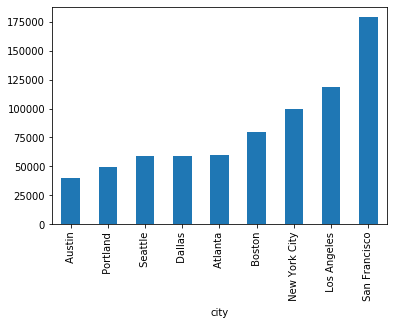

In [106]:
df.groupby("city")["city"].count().sort_values().plot.bar()

In [107]:
df["Order Date"].dtype

dtype('int64')

### Converting "hour" column into datetime object to extract values for hours to use in anew column.

In [108]:
df["hour"] = df["Order Date"]=pd.to_datetime(df["Order Date"]).dt.hour

In [109]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,city,hour
195356,150502,iPhone,1,700.00,0,"866 Spruce St, Portland, ME 04101",2,700.00,Portland,0
195357,150503,AA Batteries (4-pack),1,3.84,0,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco,0
195358,150504,27in 4K Gaming Monitor,1,389.99,0,"52 6th St, New York City, NY 10001",2,389.99,New York City,0
195359,150505,Lightning Charging Cable,1,14.95,0,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta,0
195360,150506,AA Batteries (4-pack),2,3.84,0,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle,0


### Creating a table for keys and values

In [110]:
keys = []
hour = []
for key, hour_df in df.groupby("hour"):
    keys.append(key)
    hour.append(len(hour_df))

In [111]:
hour

[743800]

In [112]:
keys

[0]

### Display the trend

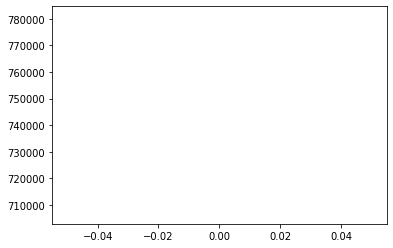

In [103]:
plt.plot(keys, hour)